In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [2]:
pd.set_option('display.max_rows', 255)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
df = pd.read_csv('..\\sentiment\\tweets_ratios.csv', header=0)
df.head()

,username,date,text,tags,translated_text,location,latitude,longitude,KADAA_ID,KADAA_AR,...,MOHAFAZA_AR,MOHAFAZA_EN,year,month,day,people_sentiment,ratio_sentiment1,ratio_sentiment2,ratio_sentiment3,ratio_sentiment4
0,Fouad Badaro,2020-09-05,#Corona #COVIDー19 Official Numbers in Lebanon ...,"['#Corona', '#كورونا_لبنان', '#كورونا', '#Stay...",#Corona #COVIDー19 Official Numbers in Lebanon ...,بيروت,33.8719,35.5097,31000,بيروت,...,بيروت,Beirut,2020,9,5,0.133333,-0.469119,-0.134676,0.71888,-0.043688
1,الكابتين,2020-09-05,#كورونا_لبنان \n#coronavirus,"['#كورونا_لبنان', '#coronavirus']",# Corona_Lebanon\n#coronavirus,بيروت,33.8719,35.5097,31000,بيروت,...,بيروت,Beirut,2020,9,5,0.000000,-0.469119,-0.134676,0.71888,-0.043688
2,سفير الشمال,2020-09-05,إدارة منتجع “البالما” توضح.. ماذا قالت عن إصاب...,"['#لبنان', '#كورونا']","The management of the ""Palma"" resort explains ...",ارة,33.5403,35.3800,81000,صيدا,...,الجنوب,South,2020,9,5,0.000000,-0.469119,-0.134676,0.71888,-0.043688
3,Jihad,2020-09-05,عاجل: وزارة الصحة اللبنانية: 415 إصابة كورونا...,['#كورونا_لبنان'],Urgent: The Lebanese Ministry of Health: 415 C...,حالات,34.0828,35.6541,56000,جبيل,...,جبل لبنان,Mount Lebanon,2020,9,5,0.000000,-0.469119,-0.134676,0.71888,-0.043688
4,Ali H. Merii,2020-09-05,أخيرا بكرا ٧ ايلول بتخلص التعبئة العامة وبترجع...,['#كورونا_لبنان'],"Finally, the 7 of September gets rid of the ge...",المشحاة,34.0500,35.7250,55000,كسروان,...,جبل لبنان,Mount Lebanon,2020,9,5,0.016667,-0.469119,-0.134676,0.71888,-0.043688


In [5]:
days = df.groupby(['month', 'day']).mean()['ratio_sentiment3'].reset_index()

In [6]:
# days

In [7]:
x = days.month.map(str) + '_' + days.day.map(str)
y = days.ratio_sentiment3

zero = [0 for _ in range(len(x))]

mean_value = days.ratio_sentiment3.mean()
median = [mean_value for _ in range(len(x))]

max_value = days.ratio_sentiment3.max()
maximum = [max_value for _ in range(len(x))]

min_value = days.ratio_sentiment3.min()
minimum = [min_value for _ in range(len(x))]

std_value = days.ratio_sentiment3.std()
pos_std = [std_value for _ in range(len(x))]
neg_std = [-std_value for _ in range(len(x))]

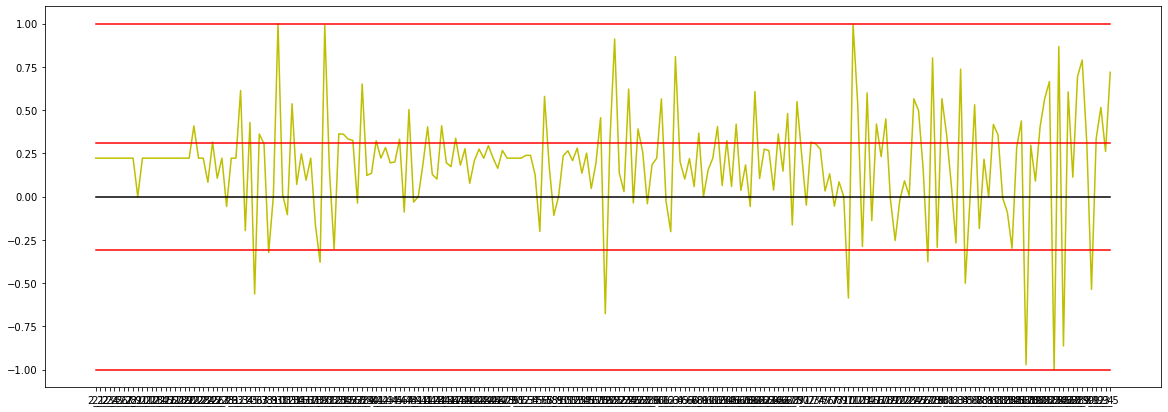

In [8]:
plt.figure(figsize=(20, 7))

plt.plot(
    x, y, 'y', 
    x, zero, 'black', 
#     x, median, 'b', 
    x, maximum, 'r', 
    x, minimum, 'r', 
    x, pos_std, 'r',
    x, neg_std, 'r'
)

In [9]:
hotspots_dict = {}
hotspots = []
for index, row in days.iterrows():
    if row.ratio_sentiment3 >= std_value or row.ratio_sentiment3 <= -std_value:
        hotspots_dict[(row.month, row.day)] = row.ratio_sentiment3
        hotspots.append(row.ratio_sentiment3)
    else:
        hotspots.append(0)
    
print(len(hotspots_dict))
print(len(hotspots))

72
218


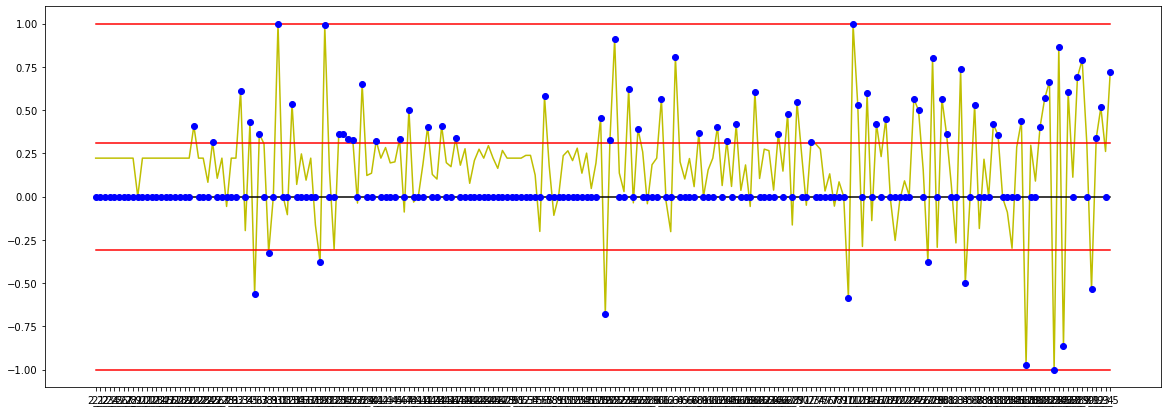

In [10]:
plt.figure(figsize=(20, 7))
plt.plot(
    x, y, 'y', 
    x, zero, 'black',
    x, maximum, 'r', 
    x, minimum, 'r', 
    x, pos_std, 'r',
    x, neg_std, 'r',
    x, hotspots, 'bo'
)

In [11]:
mask = df.apply(lambda row: True if hotspots_dict.get((row.month, row.day), None) else False, axis=1)
hotspots_data = df[mask]
hotspots_data

,username,date,text,tags,translated_text,location,latitude,longitude,KADAA_ID,KADAA_AR,...,MOHAFAZA_AR,MOHAFAZA_EN,year,month,day,people_sentiment,ratio_sentiment1,ratio_sentiment2,ratio_sentiment3,ratio_sentiment4
0,Fouad Badaro,2020-09-05,#Corona #COVIDー19 Official Numbers in Lebanon ...,"['#Corona', '#كورونا_لبنان', '#كورونا', '#Stay...",#Corona #COVIDー19 Official Numbers in Lebanon ...,بيروت,33.8719,35.5097,31000,بيروت,...,بيروت,Beirut,2020,9,5,0.133333,-0.469119,-0.134676,0.718880,-0.043688
1,الكابتين,2020-09-05,#كورونا_لبنان \n#coronavirus,"['#كورونا_لبنان', '#coronavirus']",# Corona_Lebanon\n#coronavirus,بيروت,33.8719,35.5097,31000,بيروت,...,بيروت,Beirut,2020,9,5,0.000000,-0.469119,-0.134676,0.718880,-0.043688
2,سفير الشمال,2020-09-05,إدارة منتجع “البالما” توضح.. ماذا قالت عن إصاب...,"['#لبنان', '#كورونا']","The management of the ""Palma"" resort explains ...",ارة,33.5403,35.3800,81000,صيدا,...,الجنوب,South,2020,9,5,0.000000,-0.469119,-0.134676,0.718880,-0.043688
3,Jihad,2020-09-05,عاجل: وزارة الصحة اللبنانية: 415 إصابة كورونا...,['#كورونا_لبنان'],Urgent: The Lebanese Ministry of Health: 415 C...,حالات,34.0828,35.6541,56000,جبيل,...,جبل لبنان,Mount Lebanon,2020,9,5,0.000000,-0.469119,-0.134676,0.718880,-0.043688
4,Ali H. Merii,2020-09-05,أخيرا بكرا ٧ ايلول بتخلص التعبئة العامة وبترجع...,['#كورونا_لبنان'],"Finally, the 7 of September gets rid of the ge...",المشحاة,34.0500,35.7250,55000,كسروان,...,جبل لبنان,Mount Lebanon,2020,9,5,0.016667,-0.469119,-0.134676,0.718880,-0.043688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50464,hanadie_ab,2020-02-26,Legalization Of Medical #Marijuana Approved By...,#marijuana;#lebanon,Legalization Of Medical #Marijuana Approved By...,ha,33.8272,35.8364,41000,زحلة,...,البقاع,Bekaa,2020,2,26,0.000000,-1.000000,-1.000000,0.315653,-0.061092
50465,classitudemd,2020-02-26,Lebanon Needs was founded in 2019 as a Lebanes...,#healthcare,Lebanon Needs was founded in 2019 as a Lebanes...,بيروت,33.8719,35.5097,31000,بيروت,...,بيروت,Beirut,2020,2,26,0.000000,-1.000000,-1.000000,0.315653,-0.061092
50470,med_peter,2020-02-22,My #third #publication in the #international #...,#third;#publication;#international;#journal;#c...,My #third #publication in the #international #...,بيروت,33.8719,35.5097,31000,بيروت,...,بيروت,Beirut,2020,2,22,0.000000,-1.000000,-1.000000,0.408738,-0.061092
50481,caseccc,2020-07-29,Discounted early registration & abstract submi...,#aio2020;#ai;#oncology,Discounted early registration & abstract submi...,بيروت,33.8719,35.5097,31000,بيروت,...,بيروت,Beirut,2020,7,29,0.000000,0.136201,-0.097528,0.802511,0.605822


In [12]:
def tf_idf(data, stopwords=None, max_features=1000, ngram=(1, 1)):
    tf_Idf = TfidfVectorizer(stop_words=stopwords, max_features=max_features, ngram_range=ngram)
    tf_Idf_fit = tf_Idf.fit_transform(data)
    feature_names = tf_Idf.get_feature_names()
    
    dense = tf_Idf_fit.todense()
    denselist = dense.tolist()

    tf_idf_table = pd.DataFrame(denselist, columns=feature_names)

    tf_idf_result = pd.DataFrame()
    tf_idf_result[['topic', 'score']] = tf_idf_table.mean().reset_index()
    tf_idf_result = tf_idf_result.sort_values('score', ascending=False).reset_index(drop=True)
    return tf_idf_result
        
numeric = re.compile(r'\w*\d+\w*')
def accepted_word(w):
    return len(w) > 2 and re.search(numeric, w) is None

In [13]:
data_removed = hotspots_data.text.apply(lambda s: " ".join([w for w in s.split() if not accepted_word(w)]))
stopwords = " ".join(data_removed).split()

In [14]:
len(stopwords)

73012

In [21]:
hotspots_groups = hotspots_data.groupby(['month', 'day'])
print(len(hotspots_groups.groups))

72


In [23]:
for g_key, g_data in hotspots_groups:
    topics = tf_idf(g_data.text, stopwords=stopwords, ngram=(2, 3))
    topics = topics.loc[:50]
    
    m, d = g_key
    print('[Month]:', m)
    print('[Day]:', d)
    print('[Topics]:', list(topics.topic))
    print('-----------------------------------------------------------')

[Month]: 2
[Day]: 22
[Topics]: ['twitter com', 'pic twitter com', 'pic twitter', 'https twitter com', 'https twitter', 'كورونا_لبنان pic twitter', 'كورونا_لبنان pic', 'medical center', 'bit ly', 'http bit ly', 'http bit', 'معي كورونا', 'corona virus', 'كورونا جراد', 'كورونا_لبنان الجراد', 'كورونا كورونا_لبنان', 'على لبنان', 'lebanon http', 'syrian refugees', 'healthcare lebanon', 'وزير الصحة', 'كورونا_لبنان https', 'كورونا_لبنان https twitter', 'بفيروس كورونا', 'healthcare job', 'healthcare http', 'وقف الرحلات الجوية', 'وقف الرحلات', 'الرحلات الجوية', 'kindred healthcare', 'مين قال', 'أول حالة', 'حتى الآن', 'the syrian', 'داعي للهلع', 'كورونا mtvirus', 'ولكن هذه', 'com saudi24_tv', 'com saudi24_tv status', 'twitter com saudi24_tv', 'saudi24_tv status', 'ليش حاسس', 'كورونا pic', 'كورونا pic twitter', 'أول حالة كورونا', 'حالة كورونا', 'بإفراغ مكان مكتظ', 'بإنشاء خلية', 'بيناتنا ممكن يقتل', 'بيناتنا ممكن', 'اقتصاد الصين']
-----------------------------------------------------------
[Month]

[Month]: 3
[Day]: 14
[Topics]: ['twitter com', 'pic twitter', 'pic twitter com', 'فيروس كورونا', 'https twitter', 'https twitter com', 'كورونا لبنان', 'لبنان كورونا', 'كورونا pic twitter', 'كورونا pic', 'بفيروس كورونا', 'كورونا خليك_بالبيت', 'حالة الطوارئ', 'كورونا كوفيد_19', 'خليك_بالبيت كورونا', 'وزارة الصحة', 'corona virus', 'covid_19 كورونا_الجديد', 'lebanon http', 'خليك_بالبيت pic', 'خليك_بالبيت pic twitter', 'healthcare system', 'stay home', 'covidー19 lebanon', 'كورونا covidー19', 'خليك_بالبيت كورونا لبنان', 'the medical', 'لبنان pic twitter', 'كورونا لبنان pic', 'لبنان pic', 'كورونا https', 'for medical', 'فايروس كورونا', 'المصابين بفيروس كورونا', 'المصابين بفيروس', 'كورونا_لبنان pic', 'كورونا_لبنان pic twitter', 'حالة كورونا', 'for the', 'covidー19 كورونا', 'حسن كورونا', 'لفحص كورونا', 'كورونا كورونا_لبنان', 'the corona', 'healthcare lebanon', 'رفيق الحريري', 'lebanon set', 'thank you', 'coronavirus covid_19', 'كورونا https twitter', 'corona can']
--------------------------------

[Month]: 4
[Day]: 6
[Topics]: ['كورونا لبنان', 'twitter com', 'كورونا_لبنان خليك_بالبيت', 'pic twitter', 'pic twitter com', 'كورونا كورونا_لبنان', 'لبنان كورونا_لبنان', 'كورونا_لبنان كورونا', 'https twitter com', 'https twitter', 'فيروس كورونا', 'فيروس_كورونا لبنان', 'covid_19 كورونا_لبنان', 'كورونا_لبنان covid_19', 'خليك_بالبيت كورونا_لبنان', 'bit ly', 'كورونا_لبنان لبنان', 'lebanon http', 'التزموا_بالحجر_المنزلي كورونا_لبنان', 'الحجر المنزلي', 'لبنان covid_19', 'وزير الداخلية', 'healthcare workers', 'healthcare lebanon', 'كورونا_مصر كورونا_لبنان', 'مفرد مجوز', 'الكورونا كورونا_لبنان', 'and the', 'وزارة الصحة', 'لبنان خليك_بالبيت', 'http bit ly', 'http bit', 'كورونا_لبنان covid2019', 'قرار المفرد', 'بعد كورونا', 'لبنان كورونا', 'لبنان_ينتفض كورونا كورونا_لبنان', 'لبنان_ينتفض كورونا', 'the medical', 'the lebanese', 'd9 d8', 'مواجهة كورونا', 'وزير الصحة', 'خليك_بالبيت الحجر_المنزلي', 'd8 a7', 'com news', 'كورونا covid_19', 'السماء كورونا_لبنان', 'lebanon response', 'السلطة الحاكمة', 'fo

[Month]: 5
[Day]: 21
[Topics]: ['كورونا_لبنان خليك_بالبيت', 'كورونا لبنان', 'كورونا_لبنان لبنان', 'كورونا_لبنان لبنان_ينتفض', 'وزارة الصحة', 'كورونا_لبنان كورونا', 'خليك_بالبيت كورونا_لبنان', 'كورونا كورونا_لبنان', 'covid_19 كورونا_لبنان', 'twitter com', 'إصابة جديدة', 'حالة كورونا', 'لبنان_ينتفض كورونا_لبنان', 'كورونا_لبنان covid_19', 'medical marijuana', 'وعي الشعب', 'اصابة جديدة', 'بلا_مخ كورونا_لبنان', 'bit ly', 'حسان دياب', 'لبنان كورونا_لبنان', 'pic twitter com', 'pic twitter', 'اليوم كورونا_لبنان', 'بفيروس كورونا', 'فيروس كورونا', 'مجدل عنجر', 'for the', 'لبنان_ينتفض لبنان', 'syrian refugees', 'جديدة اليوم', 'عدد الاصابات', 'جديدة بفيروس', 'عدد الإصابات', 'عيد_الفطر كورونا_لبنان', 'فايروس كورونا', 'lebanon http', 'تسجيل إصابة', 'على وعي', 'شعب لبنان', 'الدولار كورونا_لبنان', 'بالبيت كورونا_لبنان', 'marijuana dispensary', 'medical marijuana dispensary', 'كورونا اليوم', 'كورونا لبنان_ينتفض', 'كورونا جديدة', 'الجامعة اللبنانية', 'http bit ly', 'http bit', 'بعد يوم']
---------------

[Month]: 6
[Day]: 15
[Topics]: ['medical center', 'كورونا لبنان', 'bit ly', 'تسجيل إصابة جديدة', 'تسجيل إصابة', 'إصابة جديدة', 'dartmouth hitchcock', 'syrians lebanon', 'lebanon medical', 'twitter com', 'http fb', 'lebanon http', 'the total', 'treatment refugeelives', 'hitchcock medical', 'dartmouth hitchcock medical', 'ult4uo lebanon cmo', 'المفرد والمجوز كتير', 'المفرد والمجوز', 'ult4uo lebanon', 'الصين حتقدر تغمض', 'تغمض عنيك كورونا', 'عنيك كورونا', 'تغمض عنيك', 'الصين حتقدر', 'حتقدر تغمض', 'حتقدر تغمض عنيك', 'they are', 'ارتفاع إصابات كورونا', 'ارتفاع إصابات', 'مخاوف ارتفاع', 'مخاوف ارتفاع إصابات', 'إصابات كورونا', 'كورونا لبنان_ينتفض', 'bit ly 1bcwey2', 'pic twitter', 'pic twitter com', 'lebanon medical center', 'medical care', 'بفيروس كورونا', 'instagram com', 'https instagram', 'https instagram com', 'الكورونا 06 كورونا', 'آخر مستجد', 'الكورونا 06', 'providers are', 'جديدة بفيروس كورونا', 'جديدة بفيروس', 'لبنان ليرتفع', 'إصابة جديدة بالفيروس']
-----------------------------------

[Month]: 7
[Day]: 13
[Topics]: ['twitter com', 'http fb', 'pic twitter', 'pic twitter com', 'cheap medical', 'awesome and', 'awesome and cheap', 'and cheap medical', 'and cheap', 'corona cases', 'cases today', 'corona cases today', 'http tinyurl com', 'tinyurl com', 'http tinyurl', 'lebanon healthcare', 'beirut lebanon', 'تسك البلد', 'for cardiac anesthesiologist', 'anesthesiologist lebanon', 'for cardiac', 'cardiac anesthesiologist', 'cardiac anesthesiologist lebanon', 'http ow', 'http ow ly', 'ow ly', 'https twitter com', 'https twitter', 'medical experience', 'cheap medical experience', 'medical experience lebanon', 'experience lebanon', 'healthcare jobs', 'medical assistant', 'ws nd7em6', 'ws nd7em6 healthcare', 'health care', 'lebanon assumes responsibilities', 'good samaritan', 'medical secretary good', 'medical secretary', 'health system lebanon', 'health system', 'assumes responsibilities', 'lebanon assumes', 'good samaritan health', 'samaritan health', 'samaritan health system

[Month]: 7
[Day]: 31
[Topics]: ['كورونا لبنان', 'bit ly', 'twitter com', 'وزارة الصحة', 'اليوم كورونا', 'كورونا كورونا_لبنان', 'كورونا لبنان_يحتضر', 'http bit ly', 'http bit', 'and medical', 'pic twitter com', 'pic twitter', 'حالة كورونا', 'the total', 'lebanon http', 'بفيروس كورونا', 'اصابة اليوم', 'اليوم كورونا لبنان', 'اصابة اليوم كورونا', 'كورونا اليوم', 'كورونا https', 'لبنان كورونا', 'عيد_الاضحى كورونا', 'اضحى مبارك', 'hiring medical', 'new cases', 'cases today', 'lebanon healthcare', 'حالة كورونا اليوم', 'full time', 'https twitter', 'https twitter com', 'جديدة بفيروس', 'جديدة بفيروس كورونا', 'اصابة جديدة', 'وحالتا وفاة', 'إصابة جديدة', 'fri 30am', 'كل_عام_وانتم_بخير عيد_الاضحى', 'covid_19 كورونا', 'lebanese forces', 'وفاة كورونا', 'وفاة كورونا لبنان', 'your risk', 'risk during', 'your risk during', 'during covid', 'risk during covid', 'كورونا هوي', 'كورونا وحالتا وفاة', 'كورونا وحالتا']
-----------------------------------------------------------
[Month]: 8
[Day]: 1
[Topics]: ['

[Day]: 22
[Topics]: ['كورونا لبنان', 'كورونا كورونا_لبنان', 'لبنان كورونا_لبنان', 'lebanon beirut', 'and medical', 'لبنان بيروت', 'medical supplies', 'lebanon the', 'after the', 'active cases', 'the total', 'new cases', 'explosion beirut', 'medical aid', 'كورونا_لبنان كورونا', 'the world', 'room for', 'العصر كورونا_لبنان', 'كورونا لبنان بيروت', 'bit ly', 'اصابة جديدة', 'less than', 'our planet', 'كورونا_لبنان خليك_بالبيت', 'بفيروس كورونا', 'food and medical', 'food and', 'has been', 'and medical supplies', 'affected the', 'are the', 'جديدة بفيروس', 'جديدة بفيروس كورونا', 'جديدة كورونا', 'بيروت كورونا_لبنان', 'كورونا_لبنان لبنان', 'بيروت لبنان', 'بيروت لبنان كورونا_لبنان', 'تسجيل إصابات', 'تسجيل إصابات جديدة', 'إصابات جديدة', 'موقع_بالمختصر كورونا_لبنان لبنان', 'موقع_بالمختصر كورونا_لبنان', 'القطاع الصحي', 'وزارة الصحه', 'العصر الكمامة_لاتنساها كورونا_لبنان', 'منع التجول يبكي', 'بالزاوية كورونا_لبنان', 'العصر الكمامة_لاتنساها', 'منع التجول', 'الكمامة_لاتنساها كورونا_لبنان']
------------

[Month]: 9
[Day]: 3
[Topics]: ['كورونا لبنان', 'covid cases', 'لبنان إرتفاع', 'كورونا لبنان إرتفاع', 'لبنان إرتفاع متواصل', 'إرتفاع متواصل', 'worker dormitories', 'com news', 'كورونا كورونا_لبنان', 'have symptoms', 'link https', 'tackling global challenges', 'tackling global', 'yaane during classes', 'yaane during', 'https bit ly', 'bit ly', 'https bit', 'beirut explosion', 'symptoms corona', 'symptoms corona and', 'لبنان_ينتفض لبنان', 'كورونا لبنان_ينتفض', 'كورونا لبنان_ينتفض لبنان', 'thursday september', 'for the', 'emergency across', 'كورونا_لبنان stay_safe', 'wear_your_mask كورونا_لبنان stay_safe', 'wear_your_mask كورونا_لبنان', 'كورونا_لبنان stay_safe خليك_بالبيت', 'لفيروس كورونا', 'كراوية اليوم', 'كورونا لبنان ارتفاع', 'كراوية اليوم كورونا', 'اليوم كورونا', 'لبنان ارتفاع', 'لبنان ارتفاع متواصل', 'ارتفاع متواصل', 'اليوم كورونا لبنان', 'september coronavirus', 'tested positive', 'tested positive for', 'thank you september', 'you september coronavirus', 'you september', 'september c